You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [2]:
from datetime import datetime

In [3]:
year =2021
month= 1
day =1

In [4]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [5]:
# we can extract any information from our datetime object.
my_date.month

1

In [6]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [7]:
import numpy as np

In [8]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [9]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [10]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [11]:
import pandas as pd

In [12]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2020-01-01', periods=7, freq='D')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [13]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [14]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [15]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(data=['first day of the year', 'first day of school'],index= custom_index, columns= ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [16]:
df.columns

Index(['Event'], dtype='object')

In [17]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [18]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [19]:
df.index.argmax()

np.int64(1)

#### Pandas datareader

In [20]:
import pandas_datareader.data as web

In [21]:
start = pd.to_datetime('2021-01-01')
end   = pd.to_datetime('today')

In [22]:
end

Timestamp('2025-09-09 15:52:28.957886')

In [23]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [ ]:
Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
Stocks.tail()

While the pandas_datareader library was previously used for fetching stock data from various sources, including Yahoo Finance, Yahoo Finance data access through pandas_datareader has been deprecated since version 0.7.0 due to API instability.

In [25]:
# if pandas_datareader didn't work, try yfinance.
# !pip install yfinance


In [26]:
import yfinance as yf

In [27]:
Stocks = yf.download(Ticker, start, end)
Stocks.tail()

/tmp/ipython-input-2939490689.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Stocks = yf.download(Ticker, start, end)
[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2025-09-03  238.470001  334.089996  238.850006  343.329987  234.360001   
2025-09-04  239.779999  338.529999  239.899994  338.890015  236.740005   
2025-09-05  239.690002  350.839996  241.320007  355.869995  238.490005   
2025-09-08  237.880005  346.399994  240.149994  358.440002  236.339996   
2025-09-09  236.059998  346.929901  238.000000  350.760010  235.761398   

Price                         Open                Volume             
Ticker            TSLA        AAPL        TSLA      AAPL       TSLA  
Date                                                                 
2025-09-03  328.510010  237.210007  335.200012  66427800   88733300  
2025-09-04  331.480011  238.449997  336.149994  47549400   60711000  
2025-09-05  344.679993  240.000000  348.000000  54870400  108989800  
2025-09-08  344.839996  239.300003  354.640015  48959400   75009800  
2025-09-09  343.820007  237.000000  348.450012  13539667   29647540

In [30]:
df= round(Stocks['Close'],2)
df.tail()

Ticker,AAPL,TSLA
Date,,
2025-09-03,238.47,334.09
2025-09-04,239.78,338.53
2025-09-05,239.69,350.84
2025-09-08,237.88,346.40
2025-09-09,236.06,346.93


In [31]:
import matplotlib.pyplot as plt

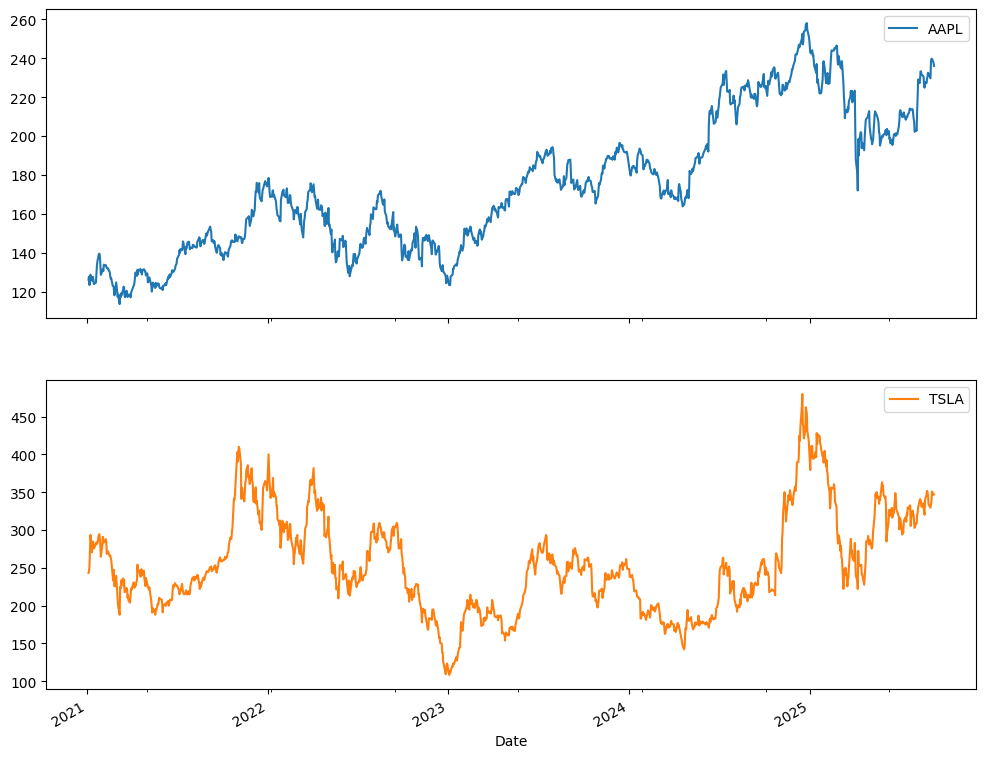

In [32]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [33]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2025-08-26', '2025-08-27', '2025-08-28', '2025-08-29',
               '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05',
               '2025-09-08', '2025-09-09'],
              dtype='datetime64[ns]', name='Date', length=1176, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [34]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

/tmp/ipython-input-1808945944.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule='M').mean()


Ticker,AAPL,TSLA
Date,,
2021-01-31,129.631053,276.258947
2021-02-28,128.313684,264.757368
2021-03-31,118.928261,218.934348
2021-04-30,128.629524,236.539048
2021-05-31,123.890500,205.584000
2021-06-30,127.035909,208.973636
2021-07-31,141.875714,219.711905
2021-08-31,145.023636,235.080455
2021-09-30,145.188095,251.317143


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [36]:
df.resample(rule='ME').mean().apply(lambda x: x/x[0])

/tmp/ipython-input-3288293728.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.resample(rule='ME').mean().apply(lambda x: x/x[0])


Ticker,AAPL,TSLA
Date,,
2021-01-31,1.000000,1.000000
2021-02-28,0.989838,0.958367
2021-03-31,0.917437,0.792497
2021-04-30,0.992274,0.856222
2021-05-31,0.955716,0.744171
2021-06-30,0.979981,0.756441
2021-07-31,1.094458,0.795311
2021-08-31,1.118741,0.850942
2021-09-30,1.120010,0.909716


/tmp/ipython-input-2016419737.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
/tmp/ipython-input-2016419737.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))


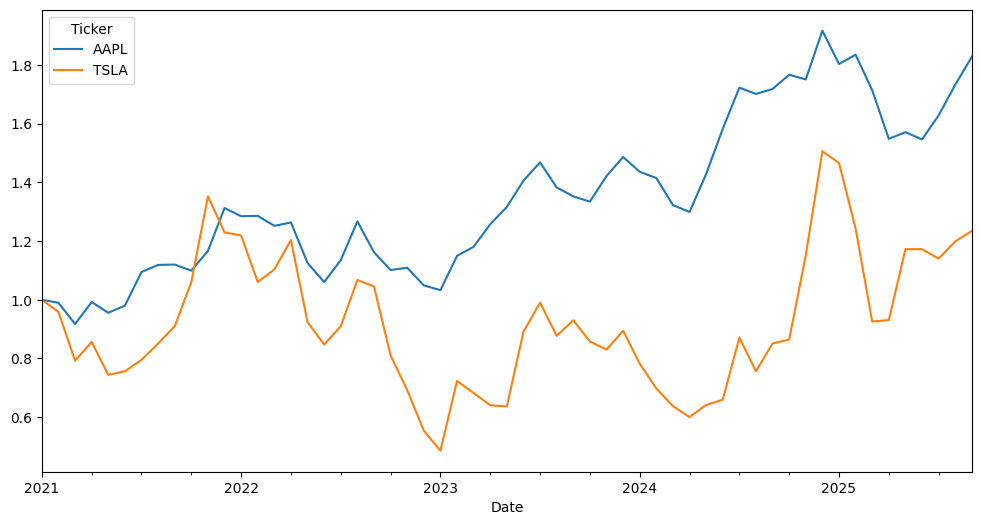

In [37]:
df.resample(rule='ME').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [38]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

/tmp/ipython-input-3704953283.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)
/tmp/ipython-input-3704953283.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)


Ticker,AAPL,TSLA
Date,,
2021-01-31,0.019667,0.087355
2021-02-28,-0.094713,-0.195649
2021-03-31,-0.044106,-0.070319
2021-04-30,0.068816,0.072083
2021-05-31,-0.058219,-0.087122
2021-06-30,0.102074,0.089436
2021-07-31,0.062602,0.013719
2021-08-31,0.044921,0.036693
2021-09-30,-0.072204,0.056355


/tmp/ipython-input-3079348549.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule='M').apply(lambda x : x.iloc[-1]/x.iloc[0]-1).plot.bar(figsize=(12,6))


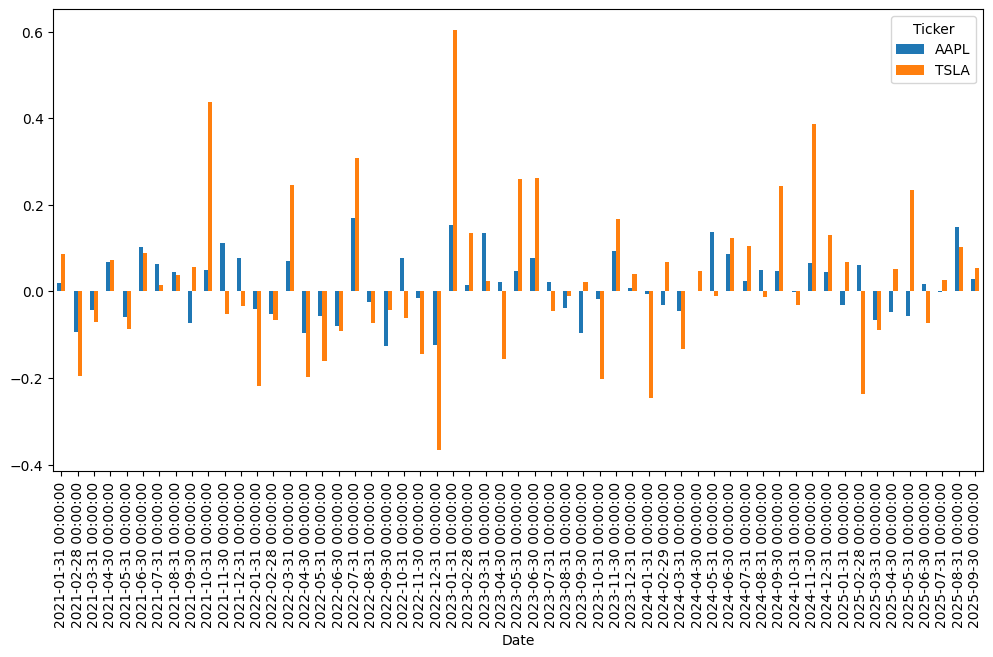

In [39]:
df.resample(rule='M').apply(lambda x : x.iloc[-1]/x.iloc[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [40]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2021-01-04,126.10
2021-01-05,127.66
2021-01-06,123.36
2021-01-07,127.57
2021-01-08,128.67


In [41]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2021-01-04,126.10,NaN,127.66
2021-01-05,127.66,126.10,123.36
2021-01-06,123.36,127.66,127.57
2021-01-07,127.57,123.36,128.67
2021-01-08,128.67,127.57,125.68


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [42]:
df.head()

Ticker,AAPL,TSLA
Date,,
2021-01-04,126.10,243.26
2021-01-05,127.66,245.04
2021-01-06,123.36,251.99
2021-01-07,127.57,272.01
2021-01-08,128.67,293.34


In [43]:
df.rolling(window=5).mean().head()

Ticker,AAPL,TSLA
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,126.672,261.128


In [44]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [45]:
df.head()

Ticker,AAPL,TSLA,TSLA_MA(30)
Date,,,
2021-01-04,126.10,243.26,NaN
2021-01-05,127.66,245.04,NaN
2021-01-06,123.36,251.99,NaN
2021-01-07,127.57,272.01,NaN
2021-01-08,128.67,293.34,NaN


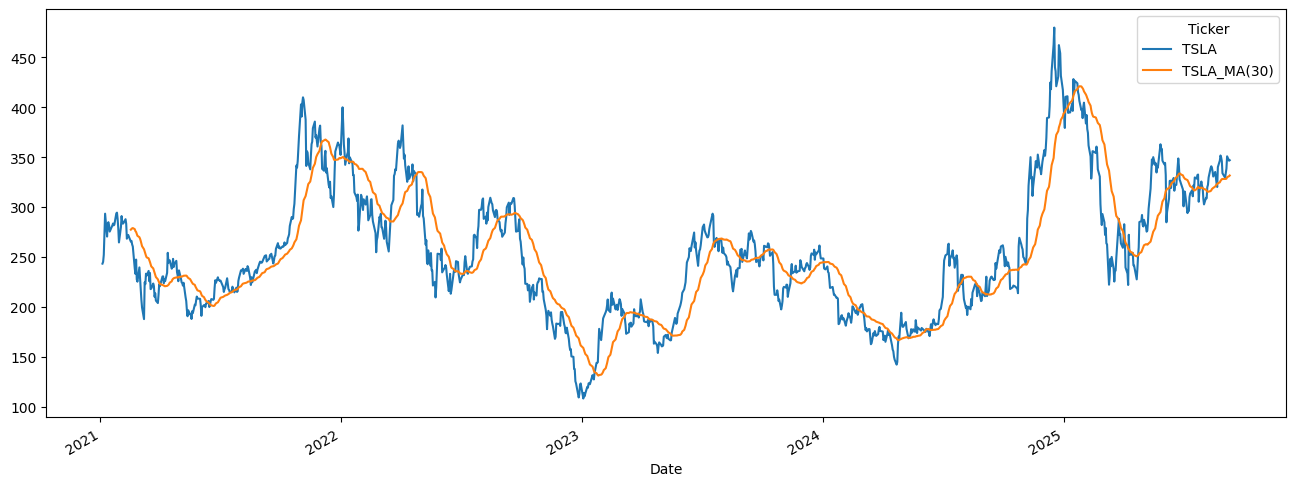

In [46]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [47]:
df['AAPL'].head()

,AAPL
Date,
2021-01-04,126.10
2021-01-05,127.66
2021-01-06,123.36
2021-01-07,127.57
2021-01-08,128.67


In [48]:
df['AAPL'].expanding().mean().head()

,AAPL
Date,
2021-01-04,126.100000
2021-01-05,126.880000
2021-01-06,125.706667
2021-01-07,126.172500
2021-01-08,126.672000


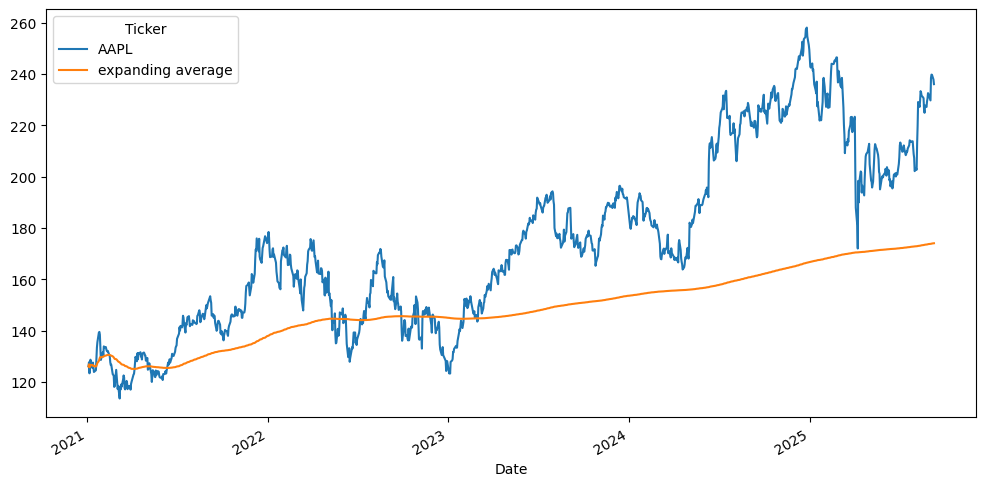

In [49]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()